### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download a few [MTA turnstile data files](http://web.mta.info/developers/turnstile.html)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }


In [3]:
import csv, glob
from collections import defaultdict

def read_csv(csv_file_name):
    turnstile_to_count_reading = defaultdict(list)
    with open(csv_file_name,'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for i, row in enumerate(csv_reader):
            if i==0: #skip header
                continue
                
            turnstile_info = tuple(row[:4]) #grabs c/a, unit, SCP, station as a tuple
            count_reading = row[4:]
            turnstile_to_count_reading[turnstile_info].append(count_reading)
            
    return turnstile_to_count_reading
    

In [4]:
weekly_data_dicts = [read_csv(csvfile) for csvfile in glob.glob('Data/turnstile_1604*.txt')]

In [5]:
sample_dict = list(weekly_data_dicts[0].items())[0:2]
from pprint import pprint
pprint(sample_dict)

[(('N072', 'R012', '05-00-01', '34 ST-PENN STA'),
  [['ACE',
    'IND',
    '04/02/2016',
    '00:00:00',
    'REGULAR',
    '0006056837',
    '0004390147                                       '],
   ['ACE',
    'IND',
    '04/02/2016',
    '04:00:00',
    'REGULAR',
    '0006056901',
    '0004390182                                       '],
   ['ACE',
    'IND',
    '04/02/2016',
    '08:00:00',
    'REGULAR',
    '0006056941',
    '0004390279                                       '],
   ['ACE',
    'IND',
    '04/02/2016',
    '12:00:00',
    'REGULAR',
    '0006057056',
    '0004390496                                       '],
   ['ACE',
    'IND',
    '04/02/2016',
    '16:00:00',
    'REGULAR',
    '0006057274',
    '0004390835                                       '],
   ['ACE',
    'IND',
    '04/02/2016',
    '20:00:00',
    'REGULAR',
    '0006057463',
    '0004391183                                       '],
   ['ACE',
    'IND',
    '04/03/2016',
    '00:00:00',
    'REGULAR

## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [6]:
from dateutil.parser import parse
from datetime import datetime

def convert_to_datetime(week_data_dict):
    time_series = defaultdict(list)
    for i, (turnstile, row_data) in enumerate(week_data_dict.items()): #tuple iterating over dictionary
        if i % 100 == 0:
            print('Processing turnstile',turnstile)
        for line, division, datestr, timestr, desc, entries, exits in row_data:
            timestamp = parse('%sT%s' % (datestr,timestr)) #combines datestr and timestr into datetime object
            time_series[turnstile].append([timestamp,int(entries)])
    return time_series

weekly_time_series = list(map(convert_to_datetime,weekly_data_dicts))

Processing turnstile ('N072', 'R012', '05-00-01', '34 ST-PENN STA')
Processing turnstile ('A002', 'R051', '02-03-04', '59 ST')
Processing turnstile ('R262A', 'R195', '04-00-00', '161/YANKEE STAD')
Processing turnstile ('R133', 'R272', '00-00-01', '28 ST')
Processing turnstile ('R112', 'R027', '02-00-04', 'WALL ST')
Processing turnstile ('J025', 'R003', '00-00-01', 'CYPRESS HILLS')
Processing turnstile ('N067', 'R012', '00-00-01', '34 ST-PENN STA')
Processing turnstile ('J037', 'R009', '00-00-00', '121 ST')
Processing turnstile ('C012', 'R258', '01-06-01', '4AV-9 ST')
Processing turnstile ('R204', 'R043', '02-03-03', 'WALL ST')
Processing turnstile ('R158', 'R084', '00-06-01', '59 ST COLUMBUS')
Processing turnstile ('N043', 'R186', '00-00-01', '86 ST')
Processing turnstile ('N327', 'R254', '00-06-02', 'GRAND-NEWTOWN')
Processing turnstile ('R251', 'R144', '00-03-00', '96 ST')
Processing turnstile ('R524', 'R347', '00-05-00', '69 ST')
Processing turnstile ('R190', 'R038', '00-00-02', '21

In [7]:
pprint(list(weekly_time_series[0].items())[:2])

[(('N072', 'R012', '05-00-01', '34 ST-PENN STA'),
  [[datetime.datetime(2016, 4, 2, 0, 0), 6056837],
   [datetime.datetime(2016, 4, 2, 4, 0), 6056901],
   [datetime.datetime(2016, 4, 2, 8, 0), 6056941],
   [datetime.datetime(2016, 4, 2, 12, 0), 6057056],
   [datetime.datetime(2016, 4, 2, 16, 0), 6057274],
   [datetime.datetime(2016, 4, 2, 20, 0), 6057463],
   [datetime.datetime(2016, 4, 3, 0, 0), 6057688],
   [datetime.datetime(2016, 4, 3, 4, 0), 6057751],
   [datetime.datetime(2016, 4, 3, 8, 0), 6057782],
   [datetime.datetime(2016, 4, 3, 12, 0), 6057860],
   [datetime.datetime(2016, 4, 3, 16, 0), 6057942],
   [datetime.datetime(2016, 4, 3, 20, 0), 6058088],
   [datetime.datetime(2016, 4, 4, 0, 0), 6058342],
   [datetime.datetime(2016, 4, 4, 4, 0), 6058365],
   [datetime.datetime(2016, 4, 4, 8, 0), 6058453],
   [datetime.datetime(2016, 4, 4, 12, 0), 6058722],
   [datetime.datetime(2016, 4, 4, 16, 0), 6058969],
   [datetime.datetime(2016, 4, 4, 20, 0), 6059383],
   [datetime.datetime(2

## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [8]:
def combine_timeseries(week_time_series):
    combined_time_series = defaultdict(list)
    for turnstile_to_weeklong_time_series in week_time_series:
        for turnstile, weeklong_time_series in turnstile_to_weeklong_time_series.items():
            combined_time_series[turnstile] += weeklong_time_series
            
    return combined_time_series

In [9]:
turnstile_to_weeklong_time_series = combine_timeseries(weekly_time_series)


In [10]:
from itertools import groupby
#check if count is within normal bounds
def count_within_normal_bounds(count):
    if count is None:
        return True
    else:
        return 10000 > count >=0

def convert_timeseries_to_daily(weeklong_timeseries):
    daily_timeseries = []
    #check day of timestamp, and combine if on same day
    
    def get_day(timeseries): #returns date from datetime object
        timestamp, cum_entries = timeseries
        return timestamp.date()
    
    count_on_previous_day = None
    for day, entries_on_this_day in groupby(weeklong_timeseries, key = get_day):
        cum_entries = max(count for time, count in entries_on_this_day) #grabs maximum count for day
        
        if count_on_previous_day is None:
            daily_entries = None
        else:
            daily_entries = cum_entries - count_on_previous_day # subtracts to get daily count
            
        count_on_previous_day = cum_entries
        
        #outlier check
        
        if count_within_normal_bounds(daily_entries):
            daily_timeseries.append((day,daily_entries))
        else:
            print('Abnormal entry found on day:',day,",",daily_entries)
            daily_timeseries.append((day,None))
    return daily_timeseries
    

In [11]:
def convert_turnstile_to_daily_timeseries(turnstile_to_time_series):
    daily_timeseries = {}
    for i, (turnstile, time_series) in enumerate(turnstile_to_time_series.items()):
        print("Processing:",turnstile)
        
        #calculate differences in order to get daily count
        daily_timeseries[turnstile]= convert_timeseries_to_daily(time_series)
    
    return daily_timeseries

turnstile_to_daily_timeseries = convert_turnstile_to_daily_timeseries(turnstile_to_weeklong_time_series)
        

Processing: ('N072', 'R012', '05-00-01', '34 ST-PENN STA')
Processing: ('R138', 'R293', '00-00-02', '34 ST-PENN STA')
Processing: ('N330C', 'R202', '01-06-01', '63 DR-REGO PARK')
Processing: ('J032', 'R006', '01-05-00', 'WOODHAVEN BLVD')
Processing: ('R291', 'R183', '00-00-02', 'BEDFORD PK BLVD')
Processing: ('N134', 'R385', '00-03-01', 'ROCKAWAY BLVD')
Processing: ('N087', 'R282', '01-06-01', 'SPRING ST')
Processing: ('N342', 'R019', '01-00-02', 'JAMAICA 179 ST')
Processing: ('N071', 'R013', '00-00-00', '34 ST-PENN STA')
Processing: ('E003', 'R369', '00-03-00', 'FT HAMILTON PKY')
Processing: ('B021', 'R228', '00-03-02', 'AVENUE J')
Processing: ('A084', 'R125', '01-00-02', 'BROAD ST')
Processing: ('R533', 'R055', '00-00-00', 'FLUSHING-MAIN')
Processing: ('E003', 'R369', '00-00-00', 'FT HAMILTON PKY')
Processing: ('R336', 'R145', '00-03-01', 'WAKEFIELD/241')
Processing: ('N304', 'R015', '01-03-01', '5 AV/53 ST')
Processing: ('R609', 'R056', '01-03-01', 'NEVINS ST')
Processing: ('N083', 

In [12]:
pprint(turnstile_to_daily_timeseries[('N305', 'R017', '01-03-04', 'LEXINGTON AV/53')])

[(datetime.date(2016, 4, 2), None),
 (datetime.date(2016, 4, 3), None),
 (datetime.date(2016, 4, 4), None),
 (datetime.date(2016, 4, 5), None),
 (datetime.date(2016, 4, 6), None),
 (datetime.date(2016, 4, 7), None),
 (datetime.date(2016, 4, 8), None),
 (datetime.date(2016, 4, 9), None),
 (datetime.date(2016, 4, 10), 0),
 (datetime.date(2016, 4, 11), None),
 (datetime.date(2016, 4, 12), None),
 (datetime.date(2016, 4, 13), None),
 (datetime.date(2016, 4, 14), None),
 (datetime.date(2016, 4, 15), None),
 (datetime.date(2016, 4, 16), None),
 (datetime.date(2016, 4, 17), None),
 (datetime.date(2016, 4, 18), None),
 (datetime.date(2016, 4, 19), None),
 (datetime.date(2016, 4, 20), None),
 (datetime.date(2016, 4, 21), None),
 (datetime.date(2016, 4, 22), None),
 (datetime.date(2016, 4, 23), None),
 (datetime.date(2016, 4, 24), None),
 (datetime.date(2016, 4, 25), None),
 (datetime.date(2016, 4, 26), None),
 (datetime.date(2016, 4, 27), None),
 (datetime.date(2016, 4, 28), None),
 (datetime.d

## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


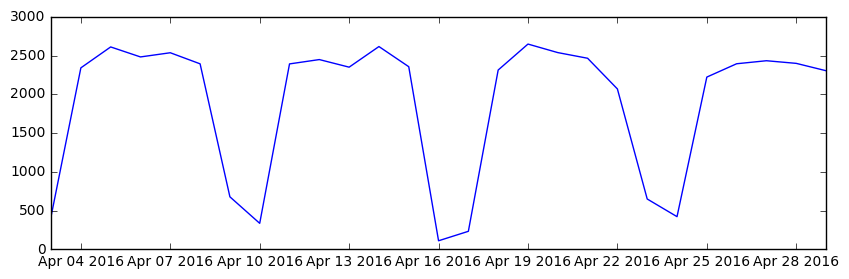

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline
timeseries = turnstile_to_daily_timeseries[('R205A', 'R014', '04-02-01', 'FULTON ST')]
days , counts = zip(*timeseries)

plt.figure(figsize=(10,3))
plt.plot(days,counts)

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [14]:
from collections import Counter

def extract_controlarea_unit_station(turnstile_timeseries):
    turnstile, timeseries = turnstile_timeseries
    controlarea, unit, scp, station = turnstile
    return(controlarea, unit, station)
    

def combine_turnstiles(turnstile_to_daily_timeseries):
    sorted_timeseries = sorted(turnstile_to_daily_timeseries.items()) #must sort before using groupby function!
    controlarea_unit_station_series = {}
    
    for controlarea_unit_station , controlarea_unit_station_items in groupby(
        sorted_timeseries, key = extract_controlarea_unit_station):
        dailycounter = Counter() #dictionary for counting
        for turnstile, datetime_count in controlarea_unit_station_items:
            for datetime, count in datetime_count:
                if count is not None:
                    dailycounter[datetime] += count
        controlarea_unit_station_series[controlarea_unit_station] = sorted(dailycounter.items())
    
    return controlarea_unit_station_series
        
controlarea_unit_station_series = combine_turnstiles(turnstile_to_daily_timeseries)
pprint(controlarea_unit_station_series[('R205A', 'R014', 'FULTON ST')])
    

[(datetime.date(2016, 4, 3), 2655),
 (datetime.date(2016, 4, 4), 11826),
 (datetime.date(2016, 4, 5), 12886),
 (datetime.date(2016, 4, 6), 12629),
 (datetime.date(2016, 4, 7), 12553),
 (datetime.date(2016, 4, 8), 12323),
 (datetime.date(2016, 4, 9), 2795),
 (datetime.date(2016, 4, 10), 1837),
 (datetime.date(2016, 4, 11), 11680),
 (datetime.date(2016, 4, 12), 12256),
 (datetime.date(2016, 4, 13), 12668),
 (datetime.date(2016, 4, 14), 12528),
 (datetime.date(2016, 4, 15), 11804),
 (datetime.date(2016, 4, 16), 658),
 (datetime.date(2016, 4, 17), 1539),
 (datetime.date(2016, 4, 18), 11536),
 (datetime.date(2016, 4, 19), 12284),
 (datetime.date(2016, 4, 20), 12378),
 (datetime.date(2016, 4, 21), 12341),
 (datetime.date(2016, 4, 22), 11471),
 (datetime.date(2016, 4, 23), 4359),
 (datetime.date(2016, 4, 24), 2897),
 (datetime.date(2016, 4, 25), 11320),
 (datetime.date(2016, 4, 26), 12223),
 (datetime.date(2016, 4, 27), 12106),
 (datetime.date(2016, 4, 28), 12076),
 (datetime.date(2016, 4, 29

## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [15]:
def extract_station(controlarea_unit_station_series):
    controlarea_unit_station, datetime_count = controlarea_unit_station_series
    controlarea, unit, station = controlarea_unit_station
    return station

def combine_turnstiles_to_stations(controlarea_unit_station_series):
    sorted_timeseries = sorted(controlarea_unit_station_series.items()) #must sort before using groupby function!
    station_series = {}
    
    for station , station_items in groupby(
        sorted_timeseries, key = extract_station):
        dailycounter = Counter() #dictionary for counting
        for turnstile, datetime_count in station_items:
            for datetime, count in datetime_count:
                if count is not None:
                    dailycounter[datetime] += count
        station_series[station] = sorted(dailycounter.items())
    
    return station_series
        
station_series = combine_turnstiles_to_stations(controlarea_unit_station_series)
pprint(station_series[( 'FULTON ST')])



[(datetime.date(2016, 4, 3), 4523),
 (datetime.date(2016, 4, 4), 18438),
 (datetime.date(2016, 4, 5), 19714),
 (datetime.date(2016, 4, 6), 19522),
 (datetime.date(2016, 4, 7), 19327),
 (datetime.date(2016, 4, 8), 19357),
 (datetime.date(2016, 4, 9), 4405),
 (datetime.date(2016, 4, 10), 2848),
 (datetime.date(2016, 4, 11), 18161),
 (datetime.date(2016, 4, 12), 19001),
 (datetime.date(2016, 4, 13), 19645),
 (datetime.date(2016, 4, 14), 19708),
 (datetime.date(2016, 4, 15), 18646),
 (datetime.date(2016, 4, 16), 2051),
 (datetime.date(2016, 4, 17), 2530),
 (datetime.date(2016, 4, 18), 18037),
 (datetime.date(2016, 4, 19), 19214),
 (datetime.date(2016, 4, 20), 19248),
 (datetime.date(2016, 4, 21), 19162),
 (datetime.date(2016, 4, 22), 18250),
 (datetime.date(2016, 4, 23), 7050),
 (datetime.date(2016, 4, 24), 4811),
 (datetime.date(2016, 4, 25), 17896),
 (datetime.date(2016, 4, 26), 18769),
 (datetime.date(2016, 4, 27), 18885),
 (datetime.date(2016, 4, 28), 18887),
 (datetime.date(2016, 4, 2

## Exercise 7
- Plot the time series for a station

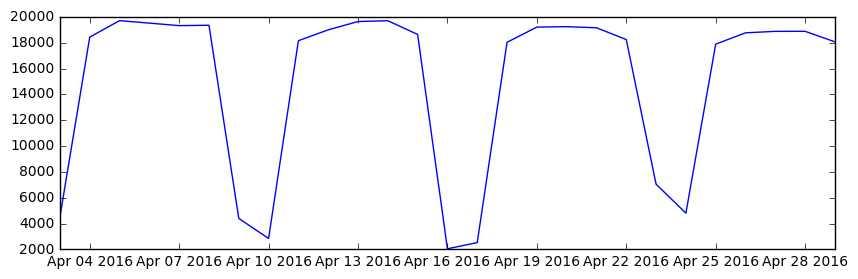

In [16]:
timeseries = station_series[('FULTON ST')]
days , counts = zip(*timeseries)

plt.figure(figsize=(10,3))
plt.plot(days,counts)

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



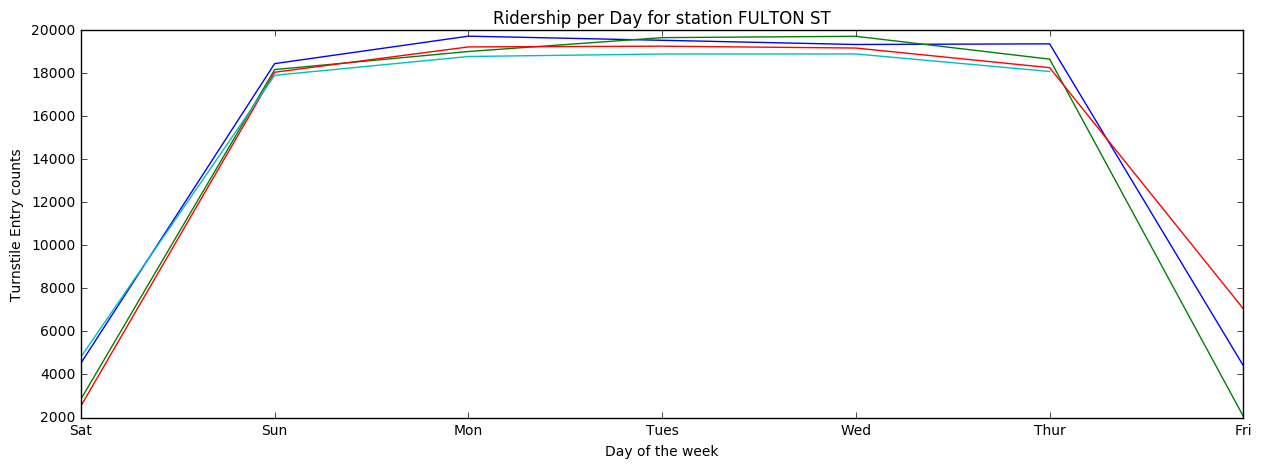

In [17]:
import numpy as np

def separate_weeks(time_series):
    timeseries_for_each_week = []
    week = []
    
    for i, (day, count) in enumerate(time_series):
        week.append((day,count))
        if i % 7 == 6:
            timeseries_for_each_week.append(week)
            week = [] #restart at end of week
    
    timeseries_for_each_week.append(week)
    return timeseries_for_each_week

def rainbow_plot_for_station(station, station_series):
    time_series = station_series[station]
    timeseries_for_each_week = separate_weeks(time_series)
    
    plt.figure(figsize = (15,5))
    for week in timeseries_for_each_week:
        days, counts = zip(*week)
        days = range(len(counts)) #need to 
        plt.plot(days,counts)
    
    plt.xlabel('Day of the week')
    plt.ylabel('Turnstile Entry counts')
    plt.title('Ridership per Day for station %s' % station)
    plt.xticks(np.arange(7), ['Sat','Sun','Mon','Tues', 'Wed', 'Thur','Fri'])
    
rainbow_plot_for_station('FULTON ST',station_series)

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [18]:
from operator import itemgetter

def extract_total_count_for_station(station,station_series):
    datetime_count = station_series[station]
    total = 0
    for datetime, count in datetime_count:
        total += count
    return total

def sum_ridership(station_series):
    ridership_dict = defaultdict(int)
    for station in station_series:
        ridership_dict[station] = extract_total_count_for_station(station,station_series)
    return ridership_dict

station_ridership = sum_ridership(station_series)
sorted_station_ridership_dict = sorted(
    station_ridership.items(),key=itemgetter(1), reverse=True)
pprint(sorted_station_ridership_dict)

[('GRD CNTRL-42 ST', 3510877),
 ('42 ST-PORT AUTH', 2270699),
 ('34 ST-PENN STA', 2126856),
 ('TIMES SQ-42 ST', 2056071),
 ('34 ST-HERALD SQ', 1868670),
 ('86 ST', 1575319),
 ('FLUSHING-MAIN', 1470360),
 ('47-50 STS ROCK', 1351035),
 ('JKSN HT-ROOSVLT', 1288589),
 ('59 ST', 1205176),
 ('W 4 ST-WASH SQ', 1135319),
 ('72 ST', 1029806),
 ('LEXINGTON AV/53', 987091),
 ('JAY ST-METROTEC', 968143),
 ('JAMAICA CENTER', 956609),
 ('42 ST-BRYANT PK', 937333),
 ('PATH WTC', 867845),
 ('14 ST-UNION SQ', 854251),
 ('BOROUGH HALL', 851967),
 ('77 ST', 851038),
 ('68ST-HUNTER CO', 802194),
 ('ATL AV-BARCLAY', 783069),
 ('33 ST', 744868),
 ('BOWLING GREEN', 715372),
 ('CROWN HTS-UTICA', 708848),
 ('BEDFORD AV', 708846),
 ('FOREST HILLS 71', 669798),
 ('49 ST', 663611),
 ('8 AV', 656853),
 ('96 ST', 653697),
 ('KEW GARDENS', 640144),
 ('23 ST', 624275),
 ('50 ST', 620302),
 ('1 AV', 610433),
 ('SUTPHIN-ARCHER', 599254),
 ('66 ST-LINCOLN', 597754),
 ('GRAND ST', 575736),
 ('14 ST', 574292),
 ("B'WAY-LA

## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

(array([ 53.,  99.,  64.,  41.,  30.,  26.,   8.,  13.,   8.,   5.,   4.,
         2.,   4.,   4.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,
         1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.]), array([    5933.  ,    76031.88,   146130.76,   216229.64,   286328.52,
         356427.4 ,   426526.28,   496625.16,   566724.04,   636822.92,
         706921.8 ,   777020.68,   847119.56,   917218.44,   987317.32,
        1057416.2 ,  1127515.08,  1197613.96,  1267712.84,  1337811.72,
        1407910.6 ,  1478009.48,  1548108.36,  1618207.24,  1688306.12,
        1758405.  ,  1828503.88,  1898602.76,  1968701.64,  2038800.52,
        2108899.4 ,  2178998.28,  2249097.16,  2319196.04,  2389294.92,
        2459393.8 ,  2529492.68,  2599591.56,  2669690.44,  2739789.32,
        2809888.2 ,  2879987.08,  2950085.96,  3020184.84,  3090283.72,
        316038

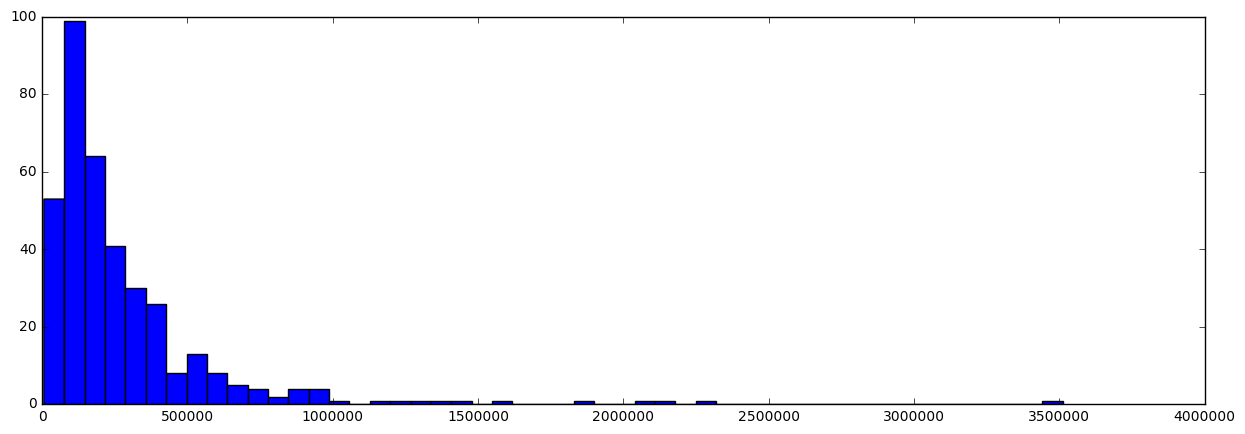

In [19]:
total_ridership_counts = list()
for station in station_ridership:
    total_ridership_counts.append(station_ridership[station])

plt.figure(figsize=(15,5))
plt.hist(total_ridership_counts, bins=50)

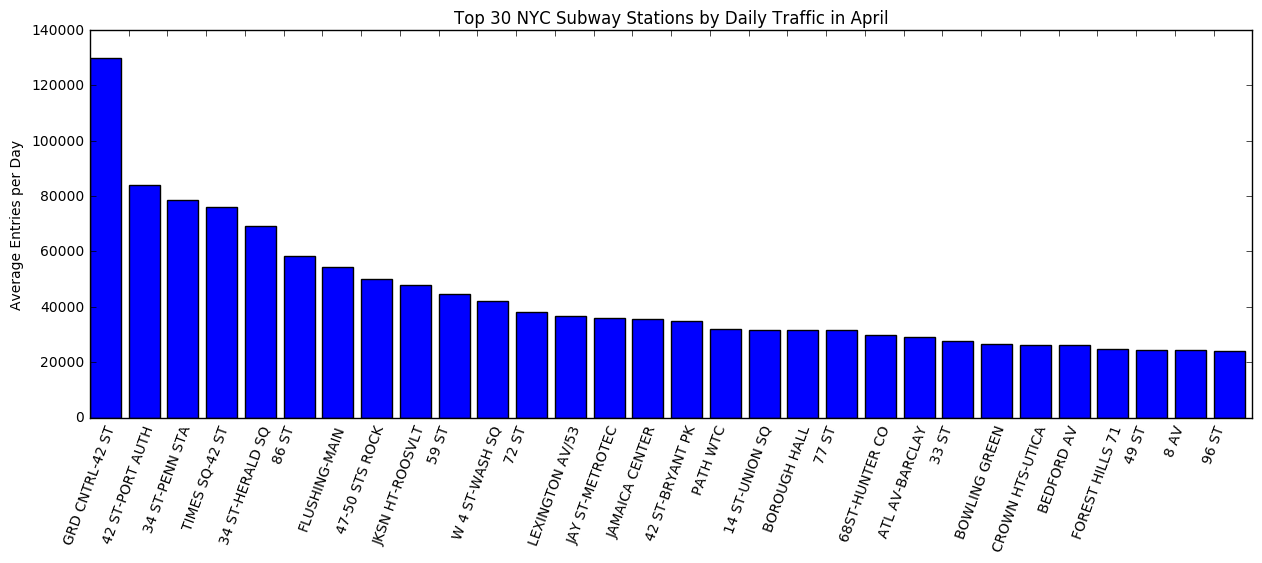

In [20]:
stations = list()
counts = list()
numberofdays = len(station_series[('FULTON ST')])
for station, count in sorted_station_ridership_dict:
    stations.append(station)
    counts.append(int(count)//numberofdays)
    
topcounts = counts[:30]
topstations = stations[:30]

indices = range(len(topcounts))
plt.figure(figsize=(15,5))
plt.bar(indices,topcounts)
plt.ylabel('Average Entries per Day')
plt.title('Top 30 NYC Subway Stations by Daily Traffic in April')
ticks = plt.xticks(indices, stations, rotation = 70)

plt.savefig('mvp.png', bbox_inches='tight')

In [21]:
print(station_ridership)

defaultdict(<class 'int'>, {'CORTELYOU RD': 156999, 'PENNSYLVANIA AV': 36251, 'CYPRESS HILLS': 36425, 'WESTCHESTER SQ': 149068, 'FAR ROCKAWAY': 119925, 'SIMPSON ST': 225200, 'W 8 ST-AQUARIUM': 56759, 'BAY 50 ST': 74081, 'BEVERLY RD': 105806, 'AQUEDUCT N.COND': 27846, '33 ST-RAWSON ST': 275454, 'WHITLOCK AV': 44446, 'LAFAYETTE AV': 124883, 'BURNSIDE AV': 279900, 'ALLERTON AV': 135650, 'HEWES ST': 67185, 'CARROLL ST': 283956, '40 ST LOWERY ST': 242956, 'ST. GEORGE': 314924, 'MORGAN AV': 202852, 'PARKSIDE AV': 139231, 'BEVERLEY ROAD': 74864, 'EAST BROADWAY': 364734, '81 ST-MUSEUM': 345206, 'CANAL ST': 142115, 'PROSPECT PARK': 271475, 'RIT-ROOSEVELT': 112166, 'BROADWAY': 329570, '65 ST': 95748, 'BRIARWOOD': 119698, 'FRANKLIN ST': 143495, '96 ST': 653697, '69 ST': 112895, '51 ST': 518413, 'BOWERY': 90884, 'AVENUE M': 141102, '8 AV': 656853, 'BEDFORD PK BLVD': 141985, 'CENTRAL AV': 91191, 'HOYT ST': 187760, 'JAMAICA VAN WK': 119780, '55 ST': 53837, 'CHRISTOPHER ST': 262297, 'YORK ST': 252512

In [44]:
import pandas as pd
df_to_pickle = pd.DataFrame()
df_to_pickle['station'] = station_ridership.keys()
df_to_pickle['traffic_feb'] = station_ridership.values()
df_to_pickle=df_to_pickle.sort_values(by=['traffic_feb'], ascending=False).reset_index()
df_to_pickle.head()

,index,station,traffic_feb
0,163,GRD CNTRL-42 ST,3510877
1,69,42 ST-PORT AUTH,2270699
2,235,34 ST-PENN STA,2126856
3,117,TIMES SQ-42 ST,2056071
4,99,34 ST-HERALD SQ,1868670


In [46]:
df_to_pickle.to_pickle('stations_traffic.p')